# Introdução a Ciência de Dados 2022-1.

## Analíse de Usuarios da Ci Telecom.
Professor Yuri Maralheiros.
Alunos:
Rodrigo Vieira de Oliveira;
João Victor Bezerra de Oliveira;
Ivo Crecencio de Araujo.

## Objetivos.

### Analisar uma base de clientes de uma empresa de telecomunicações chamada Ci Telecom, Onde a mesma gostaria de entender os motivos ou possiveis padrões que levam o cliente a cancelar o serviço.

## Os Dados
#### O arquivo telecom_users.csv contem uma amostra de dados dos usuarios da Ci Telecom onde cada coluna exibe uma categoria dos dados do contratante e cada linha o proprio cliente

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from random import randint

In [17]:
data = pd.read_csv("telecom_users.csv")
data

,Codigo,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.20,Nao
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.50,Nao
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.50,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,...,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95.00,Sim
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.30,Nao
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,...,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  5986 non-null   int64  
 1   IDCliente               5986 non-null   object 
 2   Genero                  5986 non-null   object 
 3   Aposentado              5986 non-null   int64  
 4   Casado                  5986 non-null   object 
 5   Dependentes             5985 non-null   object 
 6   MesesComoCliente        5986 non-null   int64  
 7   ServicoTelefone         5986 non-null   object 
 8   MultiplasLinhas         5986 non-null   object 
 9   ServicoInternet         5986 non-null   object 
 10  ServicoSegurancaOnline  5986 non-null   object 
 11  ServicoBackupOnline     5986 non-null   object 
 12  ProtecaoEquipamento     5986 non-null   object 
 13  ServicoSuporteTecnico   5986 non-null   object 
 14  ServicoStreamingTV      5986 non-null   

## Pré-Processamento
#### A primeira celula de codigo serve para disperção dos valores discretos das categorias em uma area definida para cada categoria de forma aleatoria com proposito de criar faixas de pontos distribuidos para melhor visualização.

#### A segunda celula é para criar uma disperção que mostra a quantidade de Serviços contratados e depois fazer a mesma distribuição de data_corr.

In [19]:
data_corr = data[['Codigo','MesesComoCliente', 'Dependentes','TipoContrato','FormaPagamento', 'ValorMensal','TotalGasto', 'Churn']]
for linha in data_corr.index:
    # DEPENDENTES
    if data_corr.loc[linha, 'Dependentes'] == "Sim":
        data_corr.loc[linha, 'Dependentes'] = randint(20, 30)
    else:
        data_corr.loc[linha, 'Dependentes'] = randint(1, 10)
    
    # tipo contrato
    if data_corr.loc[linha, 'TipoContrato'] =="2 anos":
        data_corr.loc[linha, 'TipoContrato'] = randint(367, 400)
    elif data_corr.loc[linha, 'TipoContrato'] == "anual":
        data_corr.loc[linha, 'TipoContrato'] = randint(40, 360)
    else:
        data_corr.loc[linha, 'TipoContrato'] = randint(1, 30)
    
    # Forma de pagamento
    if data_corr.loc[linha, 'FormaPagamento'] == "CartaoCredito":
        data_corr.loc[linha, 'FormaPagamento'] = randint(1,30)
    elif data_corr.loc[linha, 'FormaPagamento'] == "DebitoAutomatico":
        data_corr.loc[linha, 'FormaPagamento'] = randint(40,70)
    elif data_corr.loc[linha, 'FormaPagamento'] ==  "BoletoEletronico":
        data_corr.loc[linha, 'FormaPagamento'] = randint(80,110)
    else:
        data_corr.loc[linha, 'FormaPagamento'] = randint(120,150)
    
    #Churn
    if data_corr.loc[linha, 'Churn'] == "Sim":
        data_corr.loc[linha, 'Churn'] = 1
    else:
        data_corr.loc[linha, 'Churn'] = 0
    

In [20]:
#Contagem de serviços
dataservico = data[['Codigo','MesesComoCliente', 'ServicoTelefone', 'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline', 'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes']]
dataApenasServico = dataservico.drop(columns=['Codigo', 'MesesComoCliente'])
servicosContratados = []

for linha in dataservico.index:
    cont = 0
    for coluna in dataApenasServico.columns:
        if dataApenasServico.loc[linha, coluna] == "Sim" or dataApenasServico.loc[linha, coluna] == "Fibra" or dataApenasServico.loc[linha, coluna] == "DSL":
            cont = cont + 1
    if cont == 1:
        servicosContratados.append(randint(1,15))
    elif cont == 2:
        servicosContratados.append(randint(20,35))
    elif cont == 3:
        servicosContratados.append(randint(40,55))
    elif cont == 4:
         servicosContratados.append(randint(60,75))
    elif cont == 5:
         servicosContratados.append(randint(80,95))
    elif cont == 6:
         servicosContratados.append(randint(100,115))
    elif cont == 7:
         servicosContratados.append(randint(120,135))
    elif cont == 8:
         servicosContratados.append(randint(140,155))
dataservico['ServicosContratados'] = servicosContratados

C:\Users\ivoar\AppData\Local\Temp\ipykernel_8168\3335080539.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataservico['ServicosContratados'] = servicosContratados


# Pergunta 1
## Tempo de cliente influencia na quantidade de produtos contratados? Se sim, pra mais ou pra menos?

<AxesSubplot:xlabel='MesesComoCliente', ylabel='ServicosContratados'>

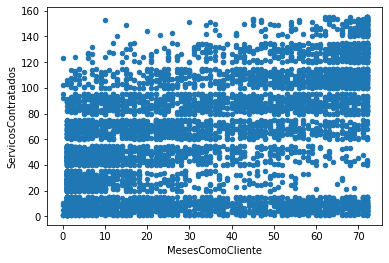

In [21]:
dataservico.plot.scatter(x= 'MesesComoCliente', y='ServicosContratados')
#A principio aparenta não ter muita relação mas é observavel casos que clientes com poucos meses dificilmente contratam mais que 6 serviços
#e pessoas que contratam por mais tempo dificilmente contrata 2 serviços

# Pergunta 2
## Ter dependentes, influência no cancelamento?

<AxesSubplot:xlabel='Codigo', ylabel='Dependentes'>

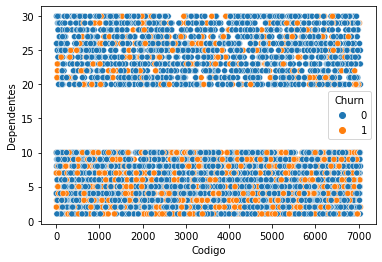

In [22]:
# Abaixo Podemos observar a correlação entre a ter dependentes e o cancelamento do serviço
# De cima para baixo temos:
# "Clientes com dependentes"
# "Clientes sem dependentes"
# Ou seja o clientes sem dependentes tiveram mais tendencia em cancelar o serviço
sns.scatterplot(x=data_corr["Codigo"], y=data_corr["Dependentes"], hue=data_corr["Churn"])

# Pergunta 3
## A forma de pagamento influencia no cancelamento?

<AxesSubplot:xlabel='Codigo', ylabel='FormaPagamento'>

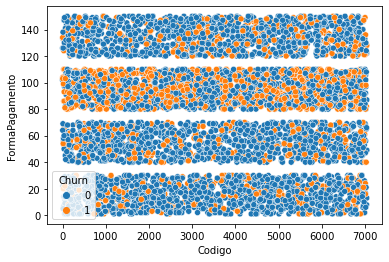

In [23]:
# Abaixo Podemos observar a correlação entre a forma de pagamento e o cancelamento do serviço
# De cima para baixo temos:
# "BoletoImpresso"
# "BoletoEletronico"
# "DebitoAutomatico"
# "CartaoCredito"
# Ou seja o clientes com forma de pagamento via boleto eletronico tiveram mais tendencia em cancelar o serviço
sns.scatterplot(x=data_corr["Codigo"], y=data_corr["FormaPagamento"], hue=data_corr["Churn"])

# Conclusões
## Concluimos que as caracteristicas dos clientes que cancelam tende a não ter dependentes, utilizam na sua maioria a forma de pagamento boleto eletronico, e também foi possivel encontrar grupos de clientes correlacionando as variaveis de (Forma de pagamento, Tipo de contrato, Dependentes, Churn)